# Plot profile(s)

In [1]:
%matplotlib inline
# for figures in notebook

# import & initialize epygram
import epygram
epygram.init_env()

# path to file
import os
INPUTS_DIR = os.path.join(epygram.config.installdir, 'doc_sphinx', 'source', 'new_gallery', 'inputs')

In [2]:
paths = [os.path.join(INPUTS_DIR, 'grid.arome-forecast.guyane0025+00{:02}:00.grib'.format(i))
         for i in (0, 12, 24)]
r = epygram.resources.meta_resource(paths, 'r', 'CL+MV')

In [3]:
f = r.readfield({'shortName':'t', 'typeOfFirstFixedSurface':100})  # temperature on pressure levels
p = f.extractprofile(-55,5)  # extract a profile

In [6]:
print(type(p))
print(p.getdata(d4=True).shape)

<class 'epygram.fields.V1DField.V1DField'>
(3, 19, 1, 1)


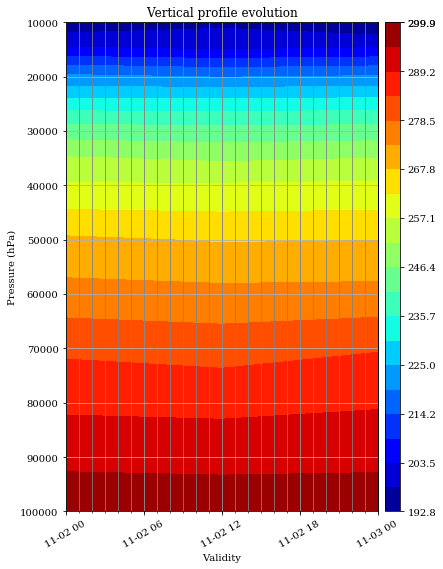

In [6]:
fig, ax = p.plotfield(title='Vertical profile evolution')

In [7]:
p0 = p.getvalidity(0)

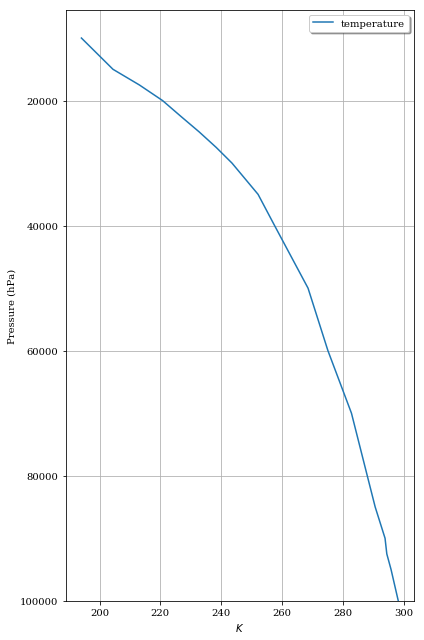

In [14]:
fig, ax = p0.plotfield(labels=['temperature'], unit='K')

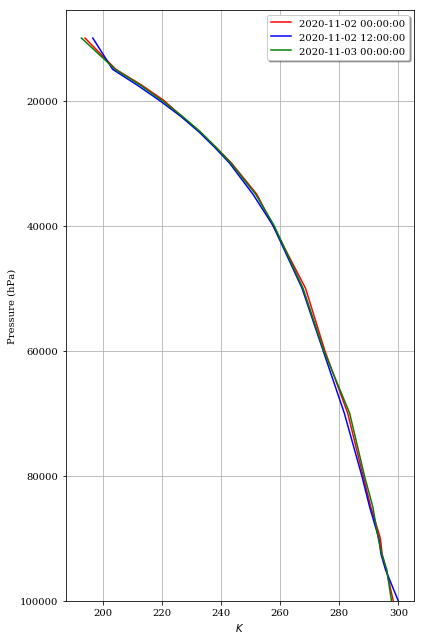

In [19]:
profiles = [p.getvalidity(i) for i in range(len(p.validity))]
fig, ax = epygram.fields.V1DField.plotprofiles(profiles,
                                               labels=[pp.validity.get() for pp in profiles],
                                               unit='K')